In [1]:
from sctoolbox.utilities import bgcolor

# Proportion Analysis
<hr style="border:2px solid black"> </hr>

<h1><center>⬐ Fill in input data here ⬎</center></h1>

In [2]:
%bgcolor PowderBlue

#Final clustering or celltype annotation column
clustering_col = "SCSA_pred_celltype"

#Set to None if not available
sample_col = "sample"

#Conditions to compare
condition_col = "chamber"
specific_conds = None  # specify conditions to compare: ["cond1", "cond2",...]. If None, all conditions are compared

#Transformation method
trans = 'logit'  # can be "logit" or "arcsin".

#Covariates to include in analysis
covariates = None

### For unreplicated data ###
#If sample_col=None, data is assumed unreplicated.
#Parameters for the bootstrapping if data is unreplicated
n_sims = 100  # number of bootstrapping simulations
n_reps = 8  # number of pseudo-replicates to generate for each condition

#P-value Threshold to determine significane
significance_threshold = 0.05

### Plots ###
#Clusters to plot
specific_clusters = None  # specify clusters you want to plot: ["c1", "c2",...], None to plot all
#Number of plots per row
n_cols = 4

<hr style="border:2px solid black"> </hr>

## Loading packages

In [3]:
import scanpy as sc
import pandas as pd
pd.set_option('display.max_columns', None)  #no limit to the number of columns shown
import sctoolbox.utilities as utils
import sctoolbox.tools as tools

utils.settings_from_config("config.yaml", key="13")
from sctoolbox._settings import settings

#We will use Scanpro for proportion analysis
from scanpro import scanpro

[WARNING] Log file 'pipeline_output/logs/13_log.txt' already exists. The file will be overwritten since 'overwrite_log' is set to True.


## Loading adata

In [5]:
adata = utils.load_h5ad("anndata_5.h5ad")
display(adata)

[INFO] The adata object was loaded from: pipeline_output/adatas/anndata_5.h5ad


AnnData object with n_obs × n_vars = 2779 × 21157
    obs: 'orig.ident', 'chamber', 'donor', 'batch', 'sample', 'celltype', 'total_counts', 'log1p_total_counts', 'total_counts_is_ribo', 'log1p_total_counts_is_ribo', 'pct_counts_is_ribo', 'total_counts_is_mito', 'log1p_total_counts_is_mito', 'pct_counts_is_mito', 'total_counts_is_gender', 'log1p_total_counts_is_gender', 'pct_counts_is_gender', 'doublet_score', 'predicted_doublet', 'predicted_sex', 'n_genes', 'log1p_n_genes', 'S_score', 'G2M_score', 'phase', 'leiden', 'LISI_score_X_pca', 'LISI_score_X_umap', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'clustering', 'SCSA_pred_celltype', 'marker_pred_celltype'
    var: 'is_ribo', 'is_mito', 'cellcycle', 'is_gender', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std

--------------

## Proportion analysis with Scanpro

In [6]:
out = scanpro(adata,
              clusters_col=clustering_col,
              samples_col=sample_col,
              conds_col=condition_col,
              conditions=specific_conds,
              covariates=covariates,
              transform=trans,
              n_sims=n_sims,
              n_reps=n_reps)

out.results

[INFO] The following conditions don't have replicates:  A
[INFO] Both normal scanpro and sim_scanpro will be performed.
[INFO] Running scanpro with original replicates...
[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!
[INFO] Running scanpro with simulated replicates...
[INFO] Generating 8 replicates and running 100 simulations...
[INFO] Finished 100 simulations in 15.81 seconds
[INFO] To access results for original replicates, run <out.results>, and <out.sim_results> for simulated results


,baseline_props,mean_props_B,mean_props_C,mean_props_D,mean_props_A,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,,
Astrocyte,0.231738,0.256253,0.195135,0.196693,0.331942,1.156548,3.955708e-01,3.955708e-01
B cell,0.028068,0.000000,0.107861,0.000000,0.000000,55.196110,5.234298e-05,9.160021e-05
Endothelial cell,0.120907,0.117371,0.009568,0.254719,0.004175,55.409458,5.171723e-05,9.160021e-05
Epithelial cell,0.234617,0.230039,0.347358,0.040720,0.557411,6.494827,2.242149e-02,2.615841e-02
Fibroblast,0.300828,0.294409,0.293170,0.428827,0.002088,21.244516,9.459820e-04,1.324375e-03
Macrophage,0.063692,0.101928,0.033666,0.079040,0.000000,363.214771,1.279897e-07,8.959280e-07
Smooth muscle cell,0.020151,0.000000,0.013241,0.000000,0.104384,208.331087,7.690017e-07,2.691506e-06


In [12]:
significant_change = (out.results['adjusted_p_values'] < significance_threshold).to_dict()
significant_change

{'Astrocyte': False,
 'B cell': True,
 'Endothelial cell': True,
 'Epithelial cell': True,
 'Fibroblast': True,
 'Macrophage': True,
 'Smooth muscle cell': True}

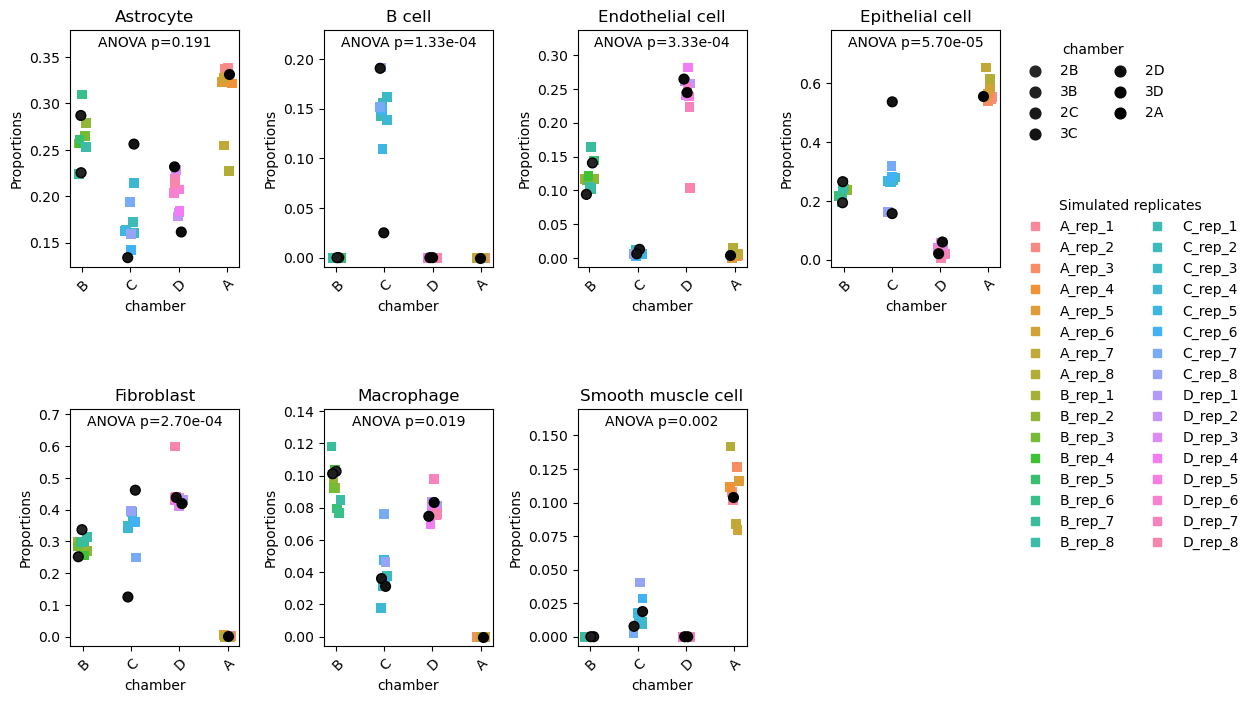

In [9]:
out.plot(kind='stripplot',
         clusters=specific_clusters,
         n_columns=n_cols,
         save=f'{settings.figure_dir}scanpro_stripplot.pdf')

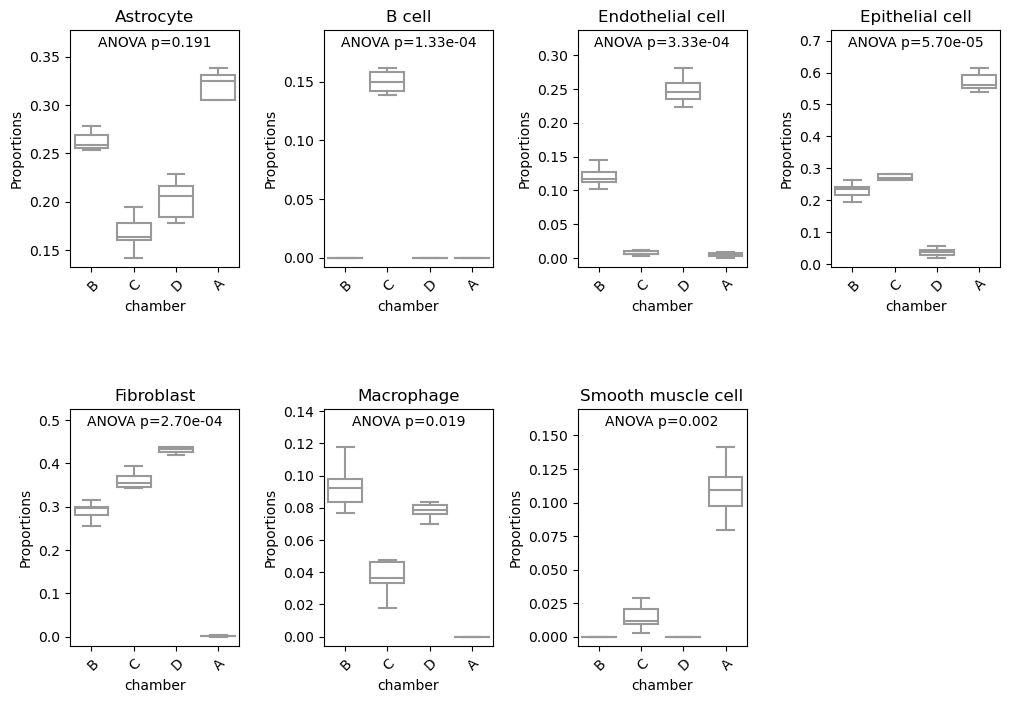

In [10]:
out.plot(kind='boxplot',
         clusters=specific_clusters,
         n_columns=n_cols,
         save=f'{settings.figure_dir}scanpro_boxplot.pdf')

In [13]:
# Save results to uns dictionary
scanpro_uns_dict = {"scanpro": {"results": out.results,
                                "significance": significant_change,
                                "proportions": out.props,
                                "counts": out.counts,
                                "transformation": trans,
                                "conditions": out.conditions}}
# Add to adata
adata.uns.update(scanpro_uns_dict)

In [14]:
utils.save_h5ad(adata, "anndata_13.h5ad")

[INFO] The adata object was saved to: pipeline_output/adatas/anndata_13.h5ad
